In [1]:
import os

## Imports

In [2]:
from nl4dv import NL4DV

### Initialize NL4DV

In [3]:
nl4dv_instance = NL4DV(data_url=os.path.join("..","..","assets","data","cars-w-year.csv"))

### Execute Query

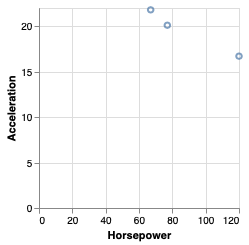

In [4]:
nl4dv_instance.render_vis("Correlate acceleration and horsepower for mercedes cars")

## More Detailed Analysis

In [5]:
from pprint import pprint

In [6]:
response = nl4dv_instance.analyze_query("Correlate acceleration and horsepower for mercedes cars")

### Output [1]: Attributes

In [7]:
attrs = response['attributeMap']
pprint(attrs)

{'Acceleration': {'ambiguity': [],
                  'isAmbiguous': False,
                  'metric': 'attribute_similarity_match',
                  'name': 'Acceleration',
                  'queryPhrase': ['acceleration'],
                  'inferenceType': 'EXPLICIT'},
 'Horsepower': {'ambiguity': [],
                'isAmbiguous': False,
                'metric': 'attribute_similarity_match',
                'name': 'Horsepower',
                'queryPhrase': ['horsepower'],
                'inferenceType': 'EXPLICIT'},
 'Model': {'ambiguity': [],
           'isAmbiguous': False,
           'metric': 'attribute_domain_value_match',
           'name': 'Model',
           'queryPhrase': ['mercedes'],
           'inferenceType': 'IMPLICIT'}}


### Output [2]: Tasks

In [8]:
tasks = response['taskMap']
pprint(tasks)

{'filter': [{'attribute': 'Model',
             'operator': 'in',
             'queryPhrase': ['mercedes'],
             'task': 'filter',
             'values': ['mercedes benz 300d',
                        'mercedes-benz 280s',
                        'mercedes-benz 240d']}]}


### Output [3]: Vega-Lite Spec for most relevant Visualization

In [9]:
spec = response['visList'][0]['vlSpec']
pprint(spec)

{'$schema': 'https://vega.github.io/schema/vega-lite/v4.json',
 'data': {'format': {'type': 'csv'},
          'url': '../../assets/data/cars-w-year.csv'},
 'encoding': {'x': {'field': 'Horsepower', 'type': 'quantitative'},
              'y': {'field': 'Acceleration', 'type': 'quantitative'}},
 'mark': {'tooltip': True, 'type': 'point'},
 'transform': [{'filter': {'field': 'Model',
                           'oneOf': ['mercedes benz 300d',
                                     'mercedes-benz 280s',
                                     'mercedes-benz 240d']}}]}


### Render the first (most) recommended Vis

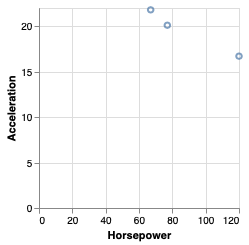

In [10]:
from vega import VegaLite
VegaLite(spec)